## Прхождение курса "Анализ данных в R"

_Нужно предсказать, сможет ли пользователь успешно закончить онлайн курс "Анализ данных в R" по активности в первые два дня._
 
_Мы будем считать, что пользователь успешно закончил курс, если он правильно решил больше 40 практических заданий. (Задача на бинарную классификацию)_

## Содержание

### Часть 0. Введение


### Обзор
 
Даны датасеты events_train и submissions_train
В данных хранится информация о действиях для 19234 студентов.

Метаданные:
**events_data_train.csv** - данные о действиях, которые совершают студенты со стэпами
   * **step_id** - id стэпа
   * **user_id** - анонимизированный id юзера
   * **timestamp** - время наступления события в формате unix date
   * **action** - событие, возможные значения: 

        ___discovered___ - пользователь перешел на стэп  
        ___viewed___ - просмотр шага  
        ___started_attempt___ - начало попытки решить шаг  
        ___passed___ - удачное решение практического шага
         
**submissions_data_train.csv** - данные о времени и статусах сабмитов к практическим заданиям

   * **step_id** - id стэпа
   * **timestamp** - время отправки решения в формате unix date
   * **submission_status** - статус решения
   * **user_id** - анонимизированный id юзера
   
### Вопросы:

Используя данные events_data_test и submission_data_test о первых двух днях активности на курсе нужно предсказать, наберет ли пользователь более 40 баллов на курсе или нет. ( выбрать лучшую модель с лучшим ROC AUC score, создать файл с предсказанием)

## [Часть 1: Импорт, Загрузка данных](#Part-1:-Import,-Load-Data.)
* ### Импорт библиотек, чтение данных из ‘.csv’ файлов

## [Часть 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions
    
    


## Часть 1: Импорт, Загрузка данных

* ### Import

In [1]:
# импортируем стандартные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


* ### Load Data

In [2]:
# считываем тренировачные данные из '.csv' файлов
events_data = pd.read_csv("event_data_train.csv")
submission_data = pd.read_csv("submissions_data_train.csv")

In [3]:
# считываем тестовые данные из '.csv' файлов
events_data_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/events_data_test.csv")
submission_data_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/submission_data_test.csv")

## Part 2: Обработка данных.

* ### Info тренировачных данных

In [4]:
# выводим полные характеристики данных events_data
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


Датасет events_data содержит 3480703 строк и 4 колонки  
Имеет два типа данных: int64, object  
Нет проущенных значений

In [5]:
events_data.user_id.nunique()

19234

В датасете events_data 19234 уникальных пользователей (user_id)

In [6]:
# выводим полные характеристики данных submission_data
submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509104 entries, 0 to 509103
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   step_id            509104 non-null  int64 
 1   timestamp          509104 non-null  int64 
 2   submission_status  509104 non-null  object
 3   user_id            509104 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 15.5+ MB


Датасет submission_data содержит 509103 строк и 4 колонки  
Имеет два типа данных: int64, object  
Нет проущенных значений

In [7]:
submission_data.user_id.nunique()

9940

В датасете submission_data 9940 уникальных пользователей (user_id)

* ### Info тестовых данных

In [8]:
# выводим полные характеристики данных events_data_test
events_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274768 entries, 0 to 274767
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   step_id    274768 non-null  int64 
 1   timestamp  274768 non-null  int64 
 2   action     274768 non-null  object
 3   user_id    274768 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 8.4+ MB


Датасет events_data_test содержит 274768 строк и 4 колонки  
Имеет два типа данных: int64, object  
Нет проущенных значений


In [9]:
# выводим полные характеристики данных submission_data_test
submission_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42261 entries, 0 to 42260
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   step_id            42261 non-null  int64 
 1   timestamp          42261 non-null  int64 
 2   submission_status  42261 non-null  object
 3   user_id            42261 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


Датасет submission_data_test содержит 42261 строк и 4 колонки  
Имеет два типа данных: int64, object  
Нет проущенных значений

* ### Head

In [10]:
# рассмотрим первые строки датасета events_data
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [11]:
# рассмотрим первые строки датасета submission_data
submission_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


## Компановка данных для машинного обучения

Необходимо определить таргет по условию "правильно решил больше 40 практических заданий"
 * для этого определяем количество уникальных правильно решенных сабмитов для каждого пользователя, и для количества больше 40, определяем таргет со значением 1, иначе со значением 0 (таблица target)
 * вычисляем время в формтае unix date, когда с момента первого посещения прошло 48 часов (таблица user_2day_timestamp)
 * объединяем таблицы events_data, submission_data, target, user_2day_timestamp 
 * оставляем только те действия пользователей, совершенные в течение первых 48 часов (таблица sum_data)

In [12]:
'''трансформация признака "submission_status" для "user_id" в датасете submission_data 
в сводную таблицу users_submission_data, по униальному количеству "step_id" '''

users_submission_data=submission_data.pivot_table(index='user_id',
                                          columns='submission_status', 
                                          values='step_id',
                                          aggfunc=lambda x: len(x.unique()),
                                          fill_value=0).reset_index()
users_submission_data.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,12
2,5,2,1
3,8,9,7
4,14,0,1


In [13]:
# создание таргет по условию "решил больше 40 практических заданий"
users_submission_data['target']=np.where(users_submission_data.correct > 40, 1, 0)
users_submission_data.head(10)
target=users_submission_data[['user_id','target']]
target.tail()

submission_status,user_id,target
9935,26787,0
9936,26790,0
9937,26794,0
9938,26797,0
9939,26798,0


In [14]:
# определяем для каждого пользователя время первого события
user_begin=events_data.groupby('user_id',as_index=False) \
                    .agg({'timestamp':'min'}).rename(columns={'timestamp':'begin_time'})
user_begin.head()

,user_id,begin_time
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [15]:
# значение 48 часов в секундах
two_days=2*24*60*60

In [16]:
# определяем для каждого пользователя время 2 дней
user_begin['two_day_timestamp']=(user_begin.begin_time+two_days)

In [17]:
user_begin.head()

,user_id,begin_time,two_day_timestamp
0,1,1472827464,1473000264
1,2,1514383364,1514556164
2,3,1434358476,1434531276
3,5,1466156809,1466329609
4,7,1521634660,1521807460


In [18]:
# объединяем таблицы events_data c submission_data
sum_data=submission_data.merge(events_data,how='outer')

In [19]:
# объединяем таблицы sum_data c user_begin
sum_data=sum_data.merge(user_begin,how='outer')

In [20]:
# отфильтровываем действия пользователей по времени
sum_data=sum_data.query('timestamp<=two_day_timestamp')

### Добавление дополнительных колонок

In [21]:
# создание колонки day, со значениями 1 (первые 24 часа с начала обучения), 2 (вторые 24 часа с начала обучения)
one_day=24*60*60
sum_data['day']=np.where(sum_data.timestamp < (sum_data.begin_time + one_day), 1, 2)

sum_data.tail()

,step_id,timestamp,submission_status,user_id,action,begin_time,two_day_timestamp,day
3773191,32927,1526762629,NaN,22851,discovered,1526762629,1526935429,1
3773192,32927,1526762629,NaN,22851,viewed,1526762629,1526935429,1
3773193,32815,1526772750,NaN,5198,viewed,1526772750,1526945550,1
3773194,32815,1526772750,NaN,5198,discovered,1526772750,1526945550,1
3773195,32815,1526772750,NaN,5198,passed,1526772750,1526945550,1


In [22]:
# объединяем таблицы sum_data c target
sum_data=sum_data.merge(target,how='outer')


In [23]:
sum_data.tail(100)

,step_id,timestamp,submission_status,user_id,action,begin_time,two_day_timestamp,day,target
961640,32929,1526726957,NaN,3887,discovered,1526726948,1526899748,1,NaN
961641,32929,1526726957,NaN,3887,viewed,1526726948,1526899748,1,NaN
961642,32929,1526726957,NaN,3887,started_attempt,1526726948,1526899748,1,NaN
961643,32814,1526726961,NaN,3887,viewed,1526726948,1526899748,1,NaN
961644,32814,1526726961,NaN,3887,discovered,1526726948,1526899748,1,NaN
...,...,...,...,...,...,...,...,...,...
961735,32927,1526762629,NaN,22851,discovered,1526762629,1526935429,1,NaN
961736,32927,1526762629,NaN,22851,viewed,1526762629,1526935429,1,NaN
961737,32815,1526772750,NaN,5198,viewed,1526772750,1526945550,1,NaN
961738,32815,1526772750,NaN,5198,discovered,1526772750,1526945550,1,NaN


In [24]:
events_data.user_id.nunique()

19234

In [25]:
sum_data.user_id.nunique()

19234

### Компановка тестовых данных для машинного обучения

In [26]:
# определяем для каждого пользователя время первого события
user_begin_test=events_data_test.groupby('user_id',as_index=False) \
                    .agg({'timestamp':'min'}).rename(columns={'timestamp':'begin_time'})
user_begin_test.head()

,user_id,begin_time
0,4,1529331707
1,6,1546889407
2,10,1534585756
3,12,1537348474
4,13,1533034354


In [27]:
# объединяем две таблицы events_data_test и submission_data_test
test_data=submission_data_test.merge(events_data_test,how='outer')

In [28]:
# объединяем две таблицы test_data и user_begin_test
test_data=test_data.merge(user_begin_test,how='outer')

In [29]:
# создание колонки day, со значениями 1 (первые 24 часа с начала обучения), 2 (вторые 24 часа с начала обучения)
one_day=24*60*60
test_data['day']=np.where(test_data.timestamp < (test_data.begin_time + one_day), 1, 2)




In [30]:
test_data.head(100)

,step_id,timestamp,submission_status,user_id,action,begin_time,day
0,31971,1526800961,wrong,24370,NaN,1526800008,1
1,31971,1526800976,wrong,24370,NaN,1526800008,1
2,31971,1526800993,wrong,24370,NaN,1526800008,1
3,31971,1526801054,correct,24370,passed,1526800008,1
4,31972,1526800664,wrong,24370,NaN,1526800008,1
...,...,...,...,...,...,...,...
95,31955,1526807150,NaN,10829,discovered,1526805984,1
96,31955,1526807150,NaN,10829,passed,1526805984,1
97,31955,1526807446,NaN,10829,viewed,1526805984,1
98,31956,1526807123,NaN,10829,viewed,1526805984,1


* ### Числовые и категориальные признаки
#### Список числовых и категориальных признаков

In [31]:
# проверка датасета sum_data на числовые и категориальные признаки
numerical_feats_sum_data = sum_data.dtypes[sum_data.dtypes != 'object'].index
print ('Количество числовых признаков: ', len(numerical_feats_sum_data))
print ()
print (sum_data[numerical_feats_sum_data].columns)
print ()
categorical_feats_sum_data = sum_data.dtypes[sum_data.dtypes == 'object'].index
print ('Количество категориальных признаков: ', len(categorical_feats_sum_data))
print ()
print (sum_data[categorical_feats_sum_data].columns)

Количество числовых признаков:  7

Index(['step_id', 'timestamp', 'user_id', 'begin_time', 'two_day_timestamp',
       'day', 'target'],
      dtype='object')

Количество категориальных признаков:  2

Index(['submission_status', 'action'], dtype='object')


In [32]:
# проверка датасета test_data на числовые и категориальные признаки
numerical_feats_test_data = test_data.dtypes[test_data.dtypes != 'object'].index
print ('Количество числовых признаков: ', len(numerical_feats_test_data))
print ()
print (test_data[numerical_feats_test_data].columns)
print ()
categorical_feats_test_data = test_data.dtypes[test_data.dtypes == 'object'].index
print ('Количество категориальных признаков: ', len(categorical_feats_test_data))
print ()
print (test_data[categorical_feats_test_data].columns)

Количество числовых признаков:  5

Index(['step_id', 'timestamp', 'user_id', 'begin_time', 'day'], dtype='object')

Количество категориальных признаков:  2

Index(['submission_status', 'action'], dtype='object')


* ### Пропущенные значения

#### Список признаков с пропущенными данными

In [33]:
# проверка признаков sum_data на пропущенные значения 
nan_columns = [i for i in sum_data.columns if sum_data[i].isnull().any()]
print(sum_data.isnull().sum())
print()
print("Здесь " + str(len(nan_columns)) +" колонок с NAN значениями для 274768 строк.")
nan_columns

step_id                   0
timestamp                 0
submission_status    846228
user_id                   0
action                55522
begin_time                0
two_day_timestamp         0
day                       0
target                94040
dtype: int64

Здесь 3 колонок с NAN значениями для 274768 строк.


['submission_status', 'action', 'target']

In [34]:
# проверка признаков test_data на пропущенные значения 
nan_columns = [i for i in test_data.columns if test_data[i].isnull().any()]
print(test_data.isnull().sum())
print()
print("Здесь " + str(len(nan_columns)) +" колонок с NAN значениями для 274768 строк.")
nan_columns

step_id                   0
timestamp                 0
submission_status    257583
user_id                   0
action                25089
begin_time                0
day                       0
dtype: int64

Здесь 2 колонок с NAN значениями для 274768 строк.


['submission_status', 'action']

### Заполнение пропущенных данных

submission_status - Категориальный - заменяем NAN на 'None'  
'action' - Категориальный - заменяем NAN на 'None'  
'target' - Числовой - заменяем NAN на 0

In [35]:
# Категориальные NAN колонки 
nan_columns_fill = [
    'submission_status',
    'action'    
    ]

# заменить 'NAN' на 'None' в этих колонках
for col in nan_columns_fill:
    sum_data[col].fillna('None', inplace = True) 
    test_data[col].fillna('None', inplace = True)
    

# Числовые NAN колонки 
na_columns_fill = [ 'target'   ]

# заменить 'NAN' на 0 
for col in na_columns_fill:
    sum_data[col].fillna(0, inplace=True)
    

In [36]:
# проверить остались ли проущенные данные
sum_data.isnull().sum().sum()

0

In [37]:
# проверить остались ли проущенные данные
test_data.isnull().sum().sum()

0

### Визуализация данных

In [38]:
print('Не прошли курс', round(sum_data['target'].value_counts()[0]/len(sum_data) * 100,2), '% of the dataset')
print('Прошли', round(sum_data['target'].value_counts()[1]/len(sum_data) * 100,2), '% of the dataset')

sum_data['target'].value_counts()


Не прошли курс 72.03 % of the dataset
Прошли 27.97 % of the dataset


0.0    692710
1.0    269030
Name: target, dtype: int64

<AxesSubplot:>

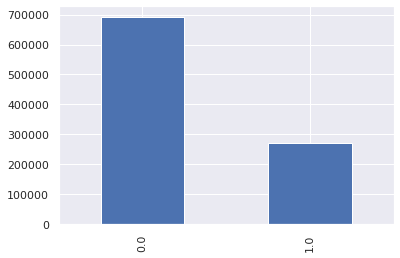

In [39]:
# visualisation plot
sum_data['target'].value_counts().plot(x = sum_data['target'], kind='bar')

Наш датасет не сбалансирован

In [40]:
# One-Hot Encoding Train dataset
train = pd.get_dummies(sum_data,columns=['action', 'submission_status'])

In [41]:
train.head()

,step_id,timestamp,user_id,begin_time,two_day_timestamp,day,target,action_None,action_discovered,action_passed,action_started_attempt,action_viewed,submission_status_None,submission_status_correct,submission_status_wrong
0,31971,1434349275,15853,1434345977,1434518777,1,1.0,0,0,1,0,0,0,1,0
1,31972,1434348300,15853,1434345977,1434518777,1,1.0,0,0,1,0,0,0,1,0
2,31976,1434348123,15853,1434345977,1434518777,1,1.0,1,0,0,0,0,0,0,1
3,31976,1434348188,15853,1434345977,1434518777,1,1.0,0,0,1,0,0,0,1,0
4,31977,1434347371,15853,1434345977,1434518777,1,1.0,0,0,1,0,0,0,1,0


In [42]:
train = train.drop(['timestamp','two_day_timestamp','action_None','submission_status_None'],axis=1)

In [43]:
train.head(50)

,step_id,user_id,begin_time,day,target,action_discovered,action_passed,action_started_attempt,action_viewed,submission_status_correct,submission_status_wrong
0,31971,15853,1434345977,1,1.0,0,1,0,0,1,0
1,31972,15853,1434345977,1,1.0,0,1,0,0,1,0
2,31976,15853,1434345977,1,1.0,0,0,0,0,0,1
3,31976,15853,1434345977,1,1.0,0,1,0,0,1,0
4,31977,15853,1434345977,1,1.0,0,1,0,0,1,0
5,31978,15853,1434345977,1,1.0,0,1,0,0,1,0
6,31979,15853,1434345977,2,1.0,0,1,0,0,1,0
7,31981,15853,1434345977,2,1.0,0,1,0,0,1,0
8,31983,15853,1434345977,2,1.0,0,1,0,0,1,0
9,31986,15853,1434345977,2,1.0,0,1,0,0,1,0


In [44]:
train=pd.pivot_table(train,index=['user_id','day'],
                     values=['step_id','target','action_discovered',
                                                           'action_passed',
                                                           'action_started_attempt',
                                                           'action_viewed',
                                                           'submission_status_correct',
                                                           'submission_status_wrong'],
                    aggfunc = {'step_id': (lambda x: len(x.unique())), 'target':np.mean, 'action_discovered': np.sum,
                                                           'action_passed': np.sum,
                                                           'action_started_attempt': np.sum,
                                                           'action_viewed': np.sum,
                                                           'submission_status_correct': np.sum,
                                                           'submission_status_wrong' : np.sum}).reset_index()
train.head()

,user_id,day,action_discovered,action_passed,action_started_attempt,action_viewed,step_id,submission_status_correct,submission_status_wrong,target
0,1,1,1,0,0,1.0,1,0,0,0.0
1,2,1,9,9,2,9.0,9,2,0,0.0
2,3,1,15,15,4,20.0,15,4,4,0.0
3,5,1,1,1,0,1.0,1,0,0,0.0
4,7,1,1,1,0,1.0,1,0,0,0.0


In [45]:
train.user_id.nunique()

19234

In [46]:
train.head(50)

,user_id,day,action_discovered,action_passed,action_started_attempt,action_viewed,step_id,submission_status_correct,submission_status_wrong,target
0,1,1,1,0,0,1.0,1,0,0,0.0
1,2,1,9,9,2,9.0,9,2,0,0.0
2,3,1,15,15,4,20.0,15,4,4,0.0
3,5,1,1,1,0,1.0,1,0,0,0.0
4,7,1,1,1,0,1.0,1,0,0,0.0
5,8,1,109,84,37,154.0,109,9,21,0.0
6,9,1,3,3,0,4.0,3,0,0,0.0
7,11,1,1,0,1,1.0,1,0,0,0.0
8,14,1,4,3,1,9.0,4,0,1,0.0
9,16,1,50,49,21,117.0,50,18,23,1.0


* ### датасет test_data

In [47]:
# One-Hot Encoding Test dataset
test = pd.get_dummies(test_data,columns=['action', 'submission_status'])

In [48]:
test.head()

,step_id,timestamp,user_id,begin_time,day,action_None,action_discovered,action_passed,action_started_attempt,action_viewed,submission_status_None,submission_status_correct,submission_status_wrong
0,31971,1526800961,24370,1526800008,1,1,0,0,0,0,0,0,1
1,31971,1526800976,24370,1526800008,1,1,0,0,0,0,0,0,1
2,31971,1526800993,24370,1526800008,1,1,0,0,0,0,0,0,1
3,31971,1526801054,24370,1526800008,1,0,0,1,0,0,0,1,0
4,31972,1526800664,24370,1526800008,1,1,0,0,0,0,0,0,1


In [49]:
test = test.drop(['timestamp','action_None','submission_status_None'],axis=1)

In [50]:
test=pd.pivot_table(test,index=['user_id','day'],
                     values=['step_id','action_discovered',
                                                           'action_passed',
                                                           'action_started_attempt',
                                                           'action_viewed',
                                                           'submission_status_correct',
                                                           'submission_status_wrong'],
                    aggfunc = {'step_id': (lambda x: len(x.unique())), 'action_discovered': np.sum,
                                                           'action_passed': np.sum,
                                                           'action_started_attempt': np.sum,
                                                           'action_viewed': np.sum,
                                                           'submission_status_correct': np.sum,
                                                           'submission_status_wrong' : np.sum}).reset_index()

## Part 3: Data Wrangling and Transformation

In [51]:
# set 'X' for features' and y' for the target ('target').
y = train['target']
X = train.drop(['target'],axis=1)



In [52]:
X_Test = test

In [53]:
test.head()

,user_id,day,action_discovered,action_passed,action_started_attempt,action_viewed,step_id,submission_status_correct,submission_status_wrong
0,4,1,1,1,0,1.0,1,0,0
1,6,1,1,1,0,1.0,1,0,0
2,10,1,2,2,0,6.0,2,0,0
3,12,1,11,9,4,14.0,12,1,0
4,13,1,54,53,20,70.0,54,19,26


In [54]:
# 'Train\Test' splitting method
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [55]:


# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(max_depth=5,random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)



In [56]:


print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))



LR Classification Report: 
               precision    recall  f1-score   support

         0.0   0.881509  0.980853  0.928532      5954
         1.0   0.559846  0.155914  0.243902       930

    accuracy                       0.869407      6884
   macro avg   0.720677  0.568384  0.586217      6884
weighted avg   0.838054  0.869407  0.836041      6884

KNN Classification Report: 
               precision    recall  f1-score   support

         0.0   0.868055  0.994458  0.926967      5954
         1.0   0.476190  0.032258  0.060423       930

    accuracy                       0.864468      6884
   macro avg   0.672123  0.513358  0.493695      6884
weighted avg   0.815115  0.864468  0.809900      6884

DT Classification Report: 
               precision    recall  f1-score   support

         0.0   0.873930  0.994290  0.930233      5954
         1.0   0.690909  0.081720  0.146154       930

    accuracy                       0.871005      6884
   macro avg   0.782419  0.538005  0.538193

In [57]:
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print("LR Confusion Matrix: \n", LR_confusion_mx)
print()
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print("KNN Confusion Matrix: \n", KNN_confusion_mx)
print()
DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print("DT Confusion Matrix: \n", DT_confusion_mx)
print()

LR Confusion Matrix: 
 [[5840  114]
 [ 785  145]]

KNN Confusion Matrix: 
 [[5921   33]
 [ 900   30]]

DT Confusion Matrix: 
 [[5920   34]
 [ 854   76]]



In [58]:
roc_auc_score(DT_pred, y_test)


0.7824194111173739

In [59]:
# Test final predictions
DT_pred1 = DT.predict(X_Test)


In [60]:
DT_pred1


array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
DT_pred1_proba = DT.predict_proba(X_Test)

In [62]:
DT_pred1_proba

array([[9.78021978e-01, 2.19780220e-02],
       [9.78021978e-01, 2.19780220e-02],
       [9.59040959e-01, 4.09590410e-02],
       ...,
       [8.80354505e-01, 1.19645495e-01],
       [9.44680851e-01, 5.53191489e-02],
       [9.99301188e-01, 6.98812020e-04]])

<AxesSubplot:>

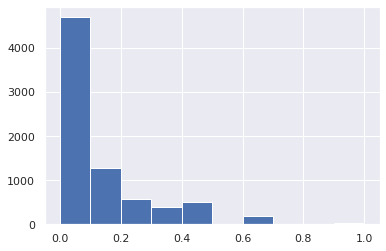

In [63]:
pd.Series(DT_pred1_proba[:,1]).hist()

In [64]:
# submission of .csv file with final predictions
sub = pd.DataFrame()
sub['user_id'] = test.user_id
sub['is_gone'] = np.round(DT_pred1_proba[:,1],2)
sub = sub.drop_duplicates(subset=['user_id'], keep='first')
sub.to_csv('StepikPredictions.csv', index=False)

### ROC AUC =0.798